In [1]:
# Load libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
movie_data = pd.read_csv(r"/Users/alexandratorti/DS PROJECT COURSE/Project 2/wiki_movie_plots_deduped.csv")
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      34886 non-null  int64 
 1   Title             34886 non-null  object
 2   Origin/Ethnicity  34886 non-null  object
 3   Director          34886 non-null  object
 4   Cast              33464 non-null  object
 5   Genre             34886 non-null  object
 6   Wiki Page         34886 non-null  object
 7   Plot              34886 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


In [3]:
# Select only films that are American in origin
us_movies = movie_data[movie_data['Origin/Ethnicity'] == 'American']

# Drop unwanted columns (Wiki.Page, Director, Cast)
us_movies = us_movies.drop(columns=['Wiki Page', 'Director', 'Cast'])

# Print the summary of the resulting DataFrame
us_movies.info()
# Filter for recent years (e.g., from 1997 onwards)
us_movies = us_movies[us_movies['Release Year'] >= 1997]


<class 'pandas.core.frame.DataFrame'>
Index: 17377 entries, 0 to 17376
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      17377 non-null  int64 
 1   Title             17377 non-null  object
 2   Origin/Ethnicity  17377 non-null  object
 3   Genre             17377 non-null  object
 4   Plot              17377 non-null  object
dtypes: int64(1), object(4)
memory usage: 814.5+ KB


In [4]:
us_movies.head()

,Release Year,Title,Origin/Ethnicity,Genre,Plot
12889,1997,…First Do No Harm,American,drama,The film tells a story in the life of a Midwes...
12890,1997,12 Angry Men,American,drama,When the final closing arguments in a murder t...
12891,1997,8 Heads in a Duffel Bag,American,black comedy,Tommy Spinelli (Joe Pesci) is a wiseguy hired ...
12892,1997,Aberration,American,horror,An oddball animal biologist/local field resear...
12893,1997,Absolute Power,American,crime drama,"During the course of a burglary, master jewel ..."


In [5]:
# Fetch Title and Plot columns
finaldata = us_movies[["Title", "Plot"]]
# Setting the movie title as index
finaldata = finaldata.set_index('Title')
finaldata.head()

,Plot
Title,
…First Do No Harm,The film tells a story in the life of a Midwes...
12 Angry Men,When the final closing arguments in a murder t...
8 Heads in a Duffel Bag,Tommy Spinelli (Joe Pesci) is a wiseguy hired ...
Aberration,An oddball animal biologist/local field resear...
Absolute Power,"During the course of a burglary, master jewel ..."


In [6]:

finaldata["Plot"] = finaldata["Plot"].astype(str)
print(finaldata.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4488 entries, …First Do No Harm to Phantom Thread
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Plot    4488 non-null   object
dtypes: object(1)
memory usage: 70.1+ KB
None


Tokenization is the process of breaking down a text into individual words or tokens. The word_tokenize function is employed to split the plot descriptions into a list of words. 

Stop words are often common across all texts and may not contribute much to the analysis. 

In [7]:
#we will need to process data to take out unimportant words
# Download stopwords dataset
nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexandratorti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alexandratorti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
finaldata['Processed_Plot'] = finaldata['Plot'].apply(preprocess_text)

In [27]:

# Assuming your CSV file has a column named 'custom_stop_words'
# Adjust the file path and column name accordingly
csv_file_path = '/Users/alexandratorti/DS PROJECT COURSE/Project 2/babynames-clean.csv'
stop_words_df = pd.read_csv(csv_file_path)
custom_stop_words = stop_words_df['name'].str.lower()
custom_stop_words = custom_stop_words.tolist()
print(custom_stop_words)

['john', 'william', 'james', 'charles', 'george', 'frank', 'joseph', 'thomas', 'henry', 'robert', 'edward', 'harry', 'walter', 'arthur', 'fred', 'albert', 'samuel', 'david', 'louis', 'joe', 'charlie', 'clarence', 'richard', 'andrew', 'daniel', 'ernest', 'will', 'jesse', 'oscar', 'lewis', 'peter', 'benjamin', 'frederick', 'willie', 'alfred', 'sam', 'roy', 'herbert', 'jacob', 'tom', 'elmer', 'carl', 'lee', 'howard', 'martin', 'michael', 'bert', 'herman', 'jim', 'francis', 'harvey', 'earl', 'eugene', 'ralph', 'ed', 'claude', 'edwin', 'ben', 'charley', 'paul', 'edgar', 'isaac', 'otto', 'luther', 'lawrence', 'ira', 'patrick', 'guy', 'oliver', 'theodore', 'hugh', 'clyde', 'alexander', 'august', 'floyd', 'homer', 'jack', 'leonard', 'horace', 'marion', 'philip', 'allen', 'archie', 'stephen', 'chester', 'willis', 'raymond', 'rufus', 'warren', 'jessie', 'milton', 'alex', 'leo', 'julius', 'ray', 'sidney', 'bernard', 'dan', 'jerry', 'calvin', 'perry', 'dave', 'anthony', 'eddie', 'amos', 'dennis', 

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer 

# Vectorizing the pre-processed plot data using TF-IDF
tfidfvec = TfidfVectorizer(stop_words=custom_stop_words) 
tfidf_plot = tfidfvec.fit_transform((finaldata["Processed_Plot"])) 
  
# Find cosine similarity 
from sklearn.metrics.pairwise import cosine_similarity 
cos_sim = cosine_similarity(tfidf_plot, tfidf_plot)

# Storing the indices of the data 
indices = pd.Series(finaldata.index)

In [29]:
print(tfidf_plot)
#Each row in this matrix corresponds to a document (plot summary), 
# and each column corresponds to a unique word in the entire corpus

  (0, 36416)	0.03857337731879141
  (0, 49259)	0.014532262709531944
  (0, 10105)	0.02187919326645035
  (0, 9639)	0.03478336121654252
  (0, 8357)	0.029221303717181814
  (0, 10314)	0.027022414936158954
  (0, 8586)	0.03134955450359385
  (0, 45053)	0.01927637026535356
  (0, 31986)	0.03972186580773028
  (0, 37239)	0.03123126686805994
  (0, 14612)	0.01671858549295524
  (0, 36894)	0.03411924732848153
  (0, 15721)	0.053618933619853565
  (0, 27948)	0.02848254386564371
  (0, 14287)	0.04110953565800095
  (0, 21916)	0.041928896409380634
  (0, 35427)	0.03586362280543437
  (0, 16943)	0.025107625408926405
  (0, 876)	0.021721937141857255
  (0, 29806)	0.027643783748135947
  (0, 46844)	0.020974147324158858
  (0, 15959)	0.031909395077248
  (0, 22352)	0.03231050005394315
  (0, 21912)	0.03359822434859674
  (0, 4368)	0.018703855210830816
  :	:
  (4487, 11198)	0.027325703208473735
  (4487, 876)	0.08112043078407258
  (4487, 43626)	0.024810751251024016
  (4487, 29278)	0.03470826029143405
  (4487, 17408)	0.02914

The code emphasizes words that are both frequent in a document and unique across the corpus, aligning with TF-IDF principles.
TF-IDF downplays common words that appear in many documents, enhancing the focus on distinctive terms and strengthen the analysis by quantifying word importance

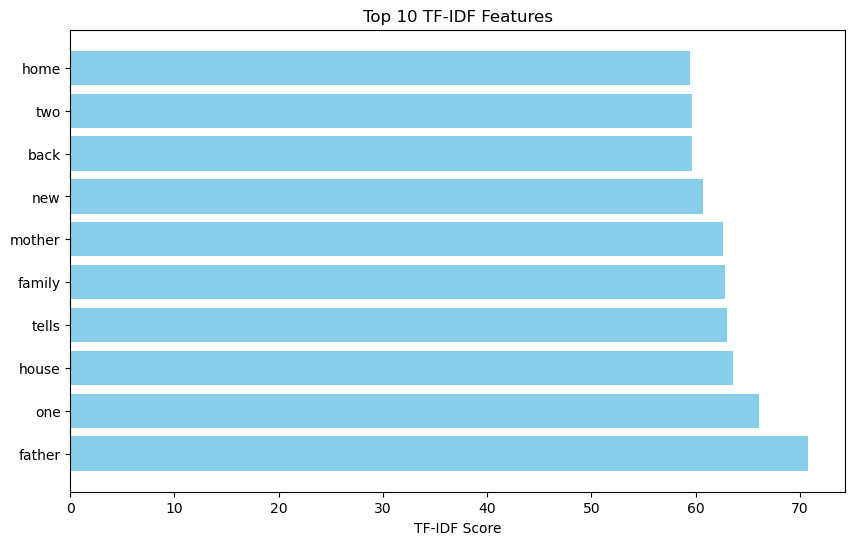

In [30]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# tfidfvec is our TfidfVectorizer instance
feature_names = tfidfvec.get_feature_names_out()

# Bar Chart for Top N Features
top_n = 10
feature_importance = tfidf_plot.sum(axis=0).A1  # Sum TF-IDF scores across all documents
top_indices = feature_importance.argsort()[-top_n:][::-1]
top_features = [feature_names[idx] for idx in top_indices]

plt.figure(figsize=(10, 6))
plt.barh(top_features, feature_importance[top_indices], color='skyblue')
plt.xlabel('TF-IDF Score')
plt.title(f'Top {top_n} TF-IDF Features')
plt.show()




This is preparing a TF-IDF representation of the movie plot data and then computing the cosine similarity between movies based on their plot descriptions. The indices are stored for later reference. The resulting cos_sim matrix can be used to find similar movies based on their plot content

In [31]:
# recommender function based on cosine similarity
def recommendations(title, cosine_sim=cos_sim):
    recommended_movies = []
    index = indices[indices == title].index[0]
    similarity_scores = pd.Series(cosine_sim[index])
    top_10 = list(np.argsort(similarity_scores)[::-1][1:11])
    for i in top_10:
        recommended_movies.append(list(finaldata.index)[i])
    return recommended_movies

In [32]:

# prints out a random movie name to test
random_movie = us_movies['Title'].sample().values[0]
print("Random Movie Name:", random_movie)

Random Movie Name: A Price Above Rubies


In [36]:
# Input movie to get recommended movies
recommendations('Simon Says')

['The Mist',
 'I Still Know What You Did Last Summer',
 'Monster Man',
 'U Turn',
 'I Know What You Did Last Summer',
 ' Cabin Fever',
 'Open Grave',
 'House at the End of the Street',
 'Safe Haven',
 'Be Kind Rewind']

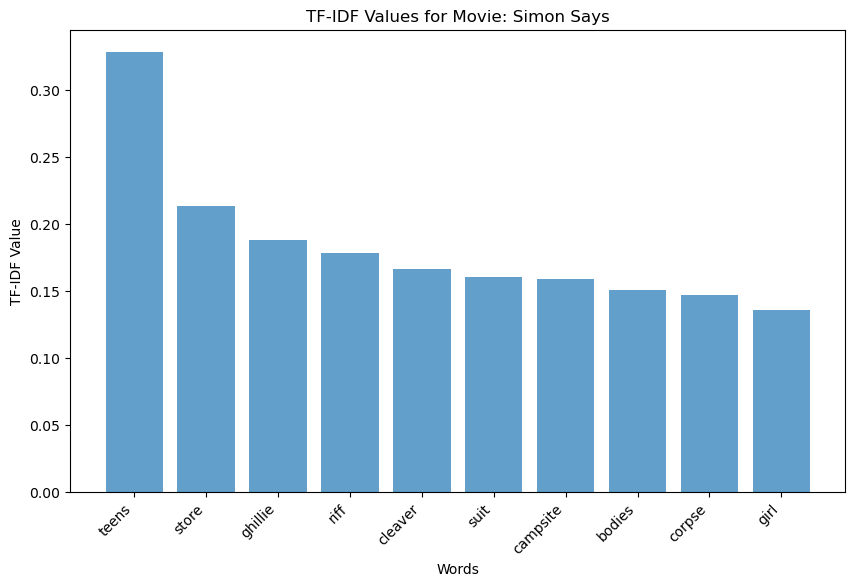

In [37]:
def plot_tfidf(title, tfidf_vectorizer):
    # Get the index of the movie
    index = indices[indices == title].index[0]
    
    # Get the TF-IDF vector for the movie plot
    tfidf_vector = tfidf_plot[index]

    # Get feature names (words)
    feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

    # Get corresponding TF-IDF values
    tfidf_values = tfidf_vector.toarray()[0]

    # Sort the features by TF-IDF value
    sorted_indices = np.argsort(tfidf_values)[::-1]

    # Plot the top N features
    N = 10
    plt.figure(figsize=(10, 6))
    plt.bar(range(N), tfidf_values[sorted_indices][:N], align="center", alpha=0.7)
    plt.xticks(range(N), feature_names[sorted_indices][:N], rotation=45, ha="right")
    plt.xlabel("Words")
    plt.ylabel("TF-IDF Value")
    plt.title(f"TF-IDF Values for Movie: {title}")
    plt.show()

# Assuming tfidfvec is your TfidfVectorizer
plot_tfidf('Simon Says', tfidfvec)